1) Problem statement.
OFLC gives job certification applications for employers seeking to bring foreign workers into the United States and grants certifications.
As In last year the count of employees were huge so OFLC needs Machine learning models to shortlist visa applicants based on their previous data.
In this project we are going to use the data given to build a Classification model:

This model is to check if Visa get approved or not based on the given dataset.
This can be used to Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the certain criteria which influences the decision.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline 

In [3]:
df=pd.read_csv('EasyVisa.csv')
df.head(10)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
5,EZYV06,Asia,Master's,Y,N,2339,2012,South,78252.1400,Year,Y,Certified
6,EZYV07,Asia,Bachelor's,N,N,4985,1994,South,53635.3900,Year,Y,Certified
7,EZYV08,North America,Bachelor's,Y,N,3035,1924,West,418.2298,Hour,Y,Denied
8,EZYV09,Asia,Bachelor's,N,N,4810,2012,Midwest,74362.1900,Year,Y,Certified
9,EZYV10,Europe,Doctorate,Y,N,2251,1995,South,67514.7600,Year,Y,Certified


In [4]:
df.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


knowing the information from dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


                                                                EXPLORING THE DATA 

In [6]:
# SEPARATING NUMERICAL AND CATEGORICAL FEATURES 
numerical_features=[feature for feature in df.columns if df[feature].dtype!='O']
categorical_features =[feature for feature in df.columns if df[feature].dtype=='O']
a=len(categorical_features)
b=len(numerical_features)
print(f'number of categorical feature in dataset is: {len(categorical_features)}')
print(f'numbe rof numerical features in datset is: {len(numerical_features)}')


number of categorical feature in dataset is: 9
numbe rof numerical features in datset is: 3


In [7]:
for features in categorical_features :
    print(df[features].value_counts(normalize=True)*100)
    print('--------------------------------------------')

case_id
EZYV01       0.003925
EZYV16995    0.003925
EZYV16993    0.003925
EZYV16992    0.003925
EZYV16991    0.003925
               ...   
EZYV8492     0.003925
EZYV8491     0.003925
EZYV8490     0.003925
EZYV8489     0.003925
EZYV25480    0.003925
Name: proportion, Length: 25480, dtype: float64
--------------------------------------------
continent
Asia             66.173469
Europe           14.646782
North America    12.919937
South America     3.343799
Africa            2.162480
Oceania           0.753532
Name: proportion, dtype: float64
--------------------------------------------
education_of_employee
Bachelor's     40.164835
Master's       37.810047
High School    13.422292
Doctorate       8.602826
Name: proportion, dtype: float64
--------------------------------------------
has_job_experience
Y    58.092622
N    41.907378
Name: proportion, dtype: float64
--------------------------------------------
requires_job_training
N    88.402669
Y    11.597331
Name: proportion, dtype: flo

INSIGHTS TAKEN FROM THIS :

                1. THE CASE_ID HAS UNIQIUE VALUE FOR EVERY ENTRY IN DATASET. SO IT CAN BE DROPPED AS IT IS OFF NO IMPORTANCE 

                2. THE CONTINENT IS HIGHLY BIASED TOWARD ASIA . IT IS OFF IMPORTANCE 
                
                3. MOST OF THE PEOPLE ARE HAVING FULL TIME POSIITON IN JOB .

                4. UNIT OF WAGE IS LESS IMPORTANT FEATURE AND CAN BE DROPPED .
                

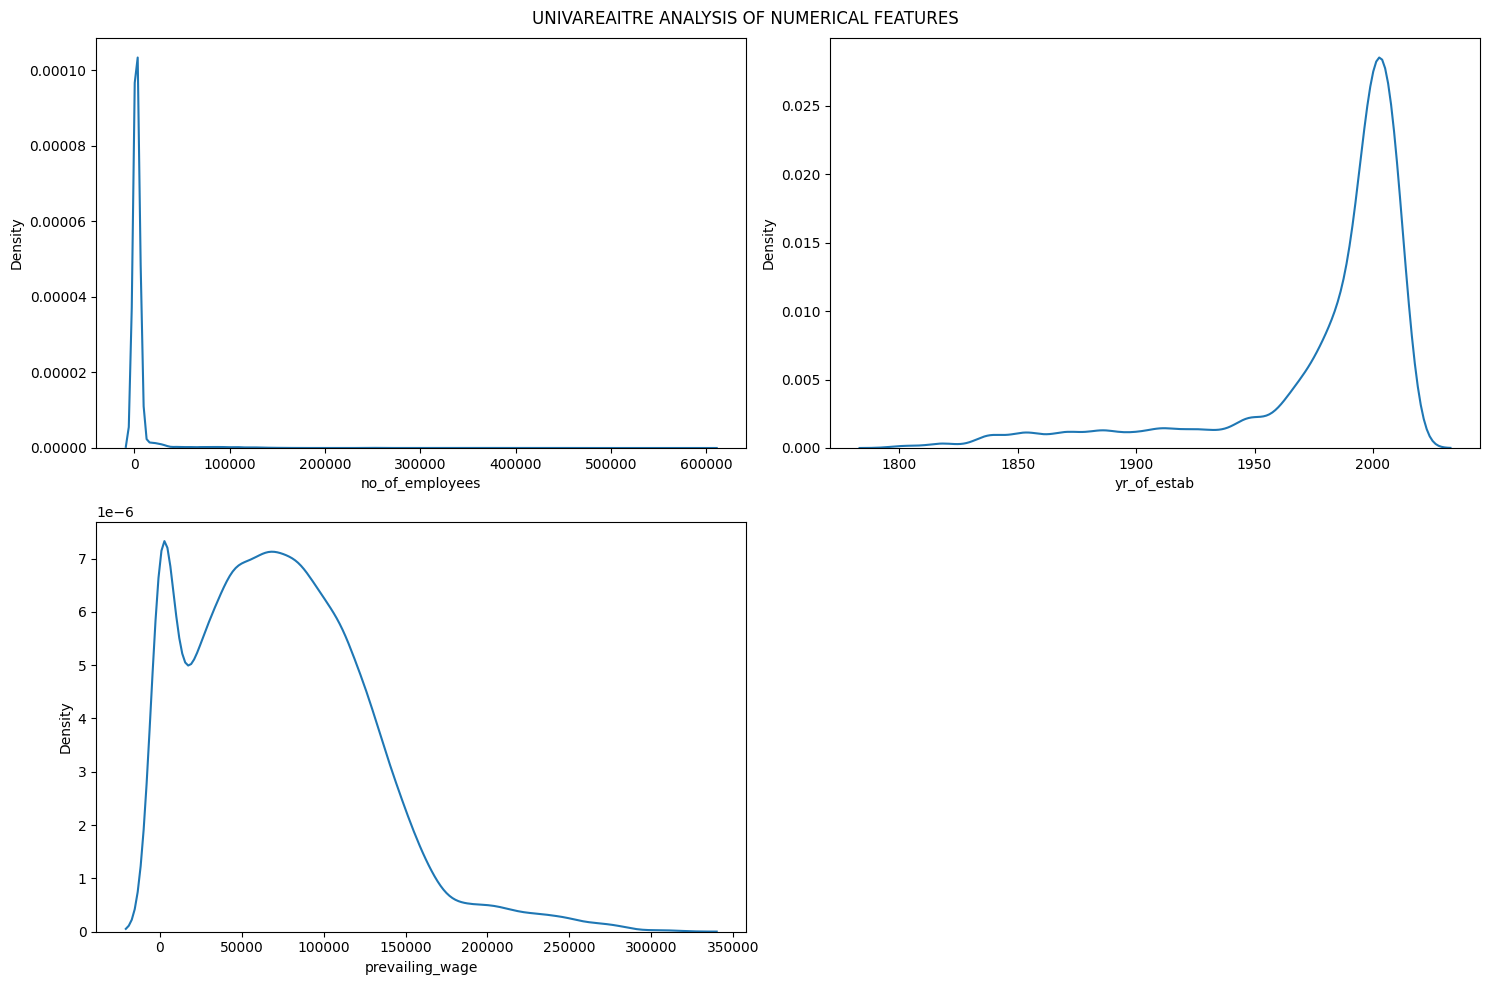

In [8]:
plt.figure(figsize=(15,10))
plt.suptitle('UNIVAREAITRE ANALYSIS OF NUMERICAL FEATURES')
for i in range (0,len(numerical_features)):
    plt.subplot(2,2,i+1)
    sns.kdeplot(x=df[numerical_features[i]])
    plt.xlabel(numerical_features[i])
    plt.tight_layout()

        INFORMATION GAINED :

                      1.NO. OF EPLOYEES IS LEFT SKEWED .

                      2. YR_OF_ESTABLISHMENT IS RIGHT SKEWED AND IT IS DISCRETE FEATURE  

                      3. PREVALING WAGE IS Right skewed and graph is multimnodal as it has multiple peaks 

<Axes: xlabel='prevailing_wage', ylabel='Density'>

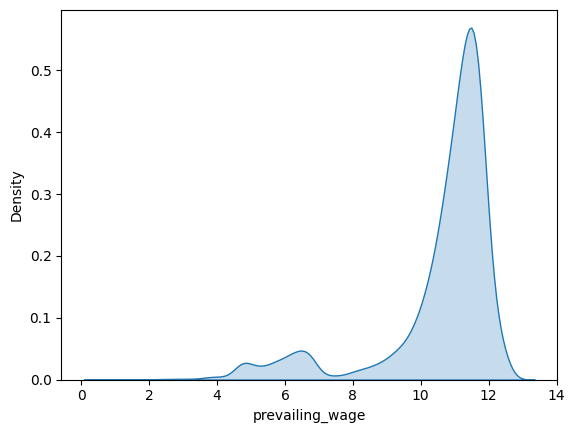

In [9]:
wage_log = np.log(df['prevailing_wage'][df['prevailing_wage'] > 0])

sns.kdeplot(wage_log,fill=True)

<class 'list'>
['case_id', 'continent', 'education_of_employee', 'has_job_experience', 'requires_job_training', 'region_of_employment', 'unit_of_wage', 'full_time_position', 'case_status']


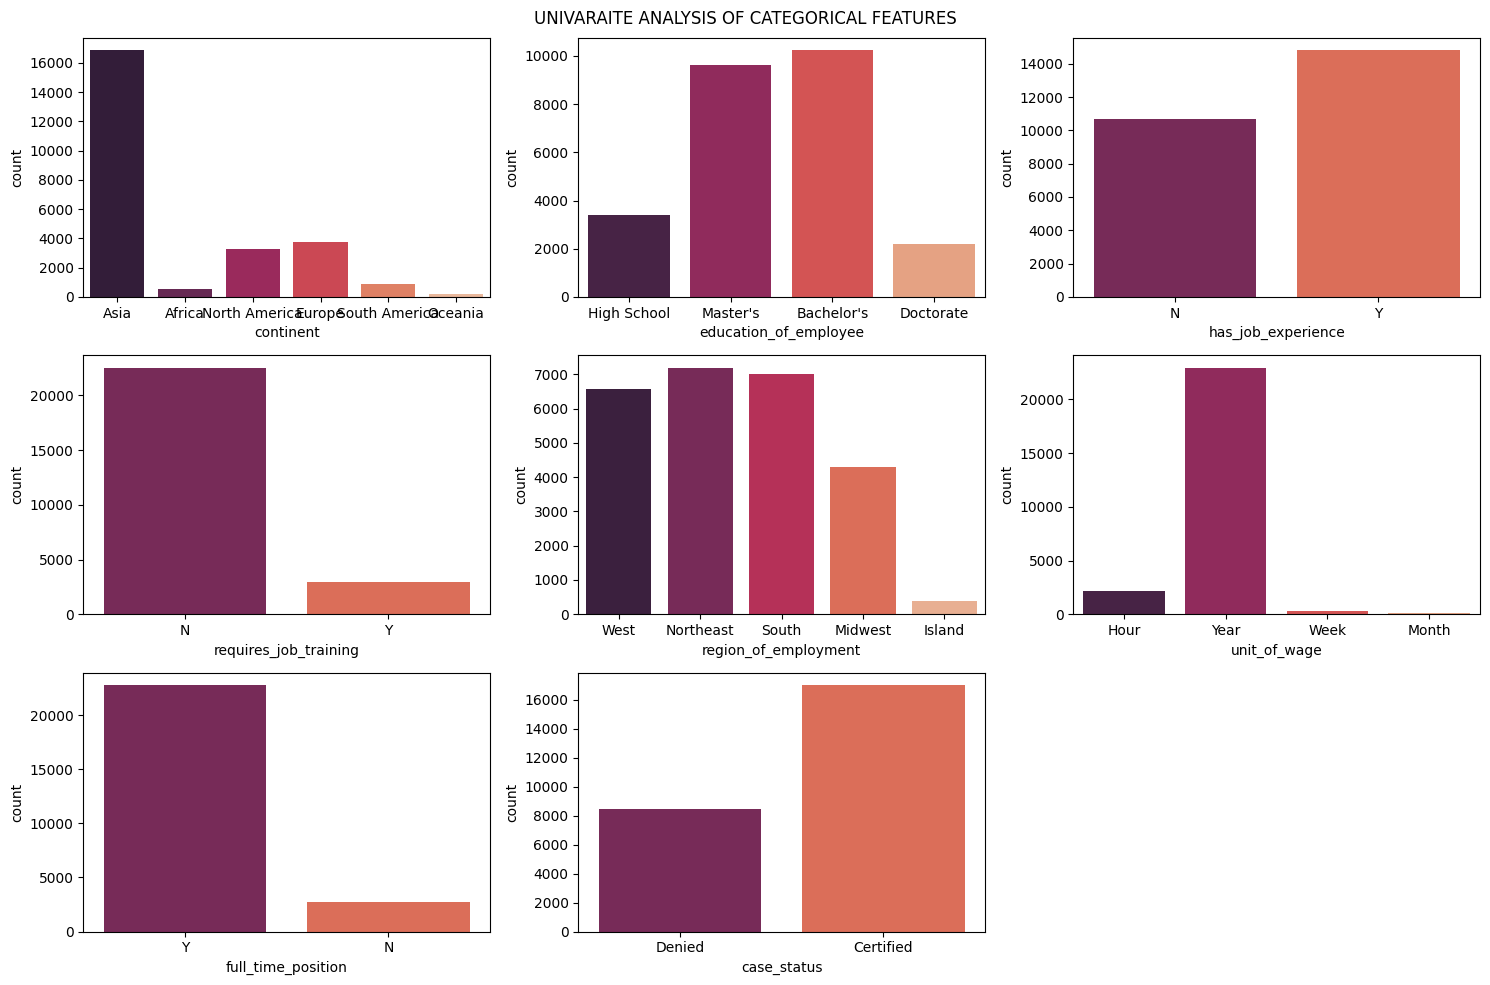

In [10]:
print(type(categorical_features))
print(categorical_features)
categorical_features.remove('case_id')
plt.figure(figsize=(15,10))
plt.suptitle('UNIVARAITE ANALYSIS OF CATEGORICAL FEATURES')
for i in range (0,len(categorical_features)):
    plt.subplot(3,3,i+1)
    sns.countplot(x=df[categorical_features[i]],color='green',palette='rocket')
    plt.xlabel(categorical_features[i])
    plt.tight_layout()


In [20]:
discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<=10]
continous_feature=[feature for feature in numerical_features if len(df[feature].unique())>10]

print(f'no od continous features are : {len(continous_feature)}')
print(f'no of discrete features are : {len(discrete_feature)}')

no od continous features are : 3
no of discrete features are : 0


      MULTI COLINEARITY: 

      FOR TESTING THE CORRELATION BETWEEN THE categorical features  WE NEED FOLLWOING METHOD :

      1>  CHi-SQAURE TEST 

      2>  CRAMERS V TEST ; IT IS A CHI SQAURE TEST BUT VALUE BETWEEN 0 TO 1.

HERE REQUIRES_JOB_TRAINING IS FAILED TO REJCT THE NULL HYPOTHESIS . SO IT MEANS IT IS NOT CORRELATED WITH THE CASE_STATUS.

NULL HPOTHESIS : FEATURE IS NOT CORRLEATED TO THE CASE_STATUS.

ALTERNATE HYPOTHEISS : FEATURE IS RELATED TO CASE_STATUS.

In [14]:
from scipy.stats import chi2_contingency
chi_test=[]
for feature in categorical_features:
    if chi2_contingency(pd.crosstab(df['case_status'],df[feature]))[1]<0.05:
        chi_test.append('rejected the null hypothesis')
    else:
        chi_test.append('failed to rejected the null hypothesis')

result=pd.DataFrame(data=[categorical_features,chi_test]).T
result.columns=['categorical_columsn','result of chi_test']
result

,categorical_columsn,result of chi_test
0,continent,rejected the null hypothesis
1,education_of_employee,rejected the null hypothesis
2,has_job_experience,rejected the null hypothesis
3,requires_job_training,failed to rejected the null hypothesis
4,region_of_employment,rejected the null hypothesis
5,unit_of_wage,rejected the null hypothesis
6,full_time_position,rejected the null hypothesis
7,case_status,rejected the null hypothesis


In [21]:
print(f'continous features are: {continous_feature}')

continous features are: ['no_of_employees', 'yr_of_estab', 'prevailing_wage']


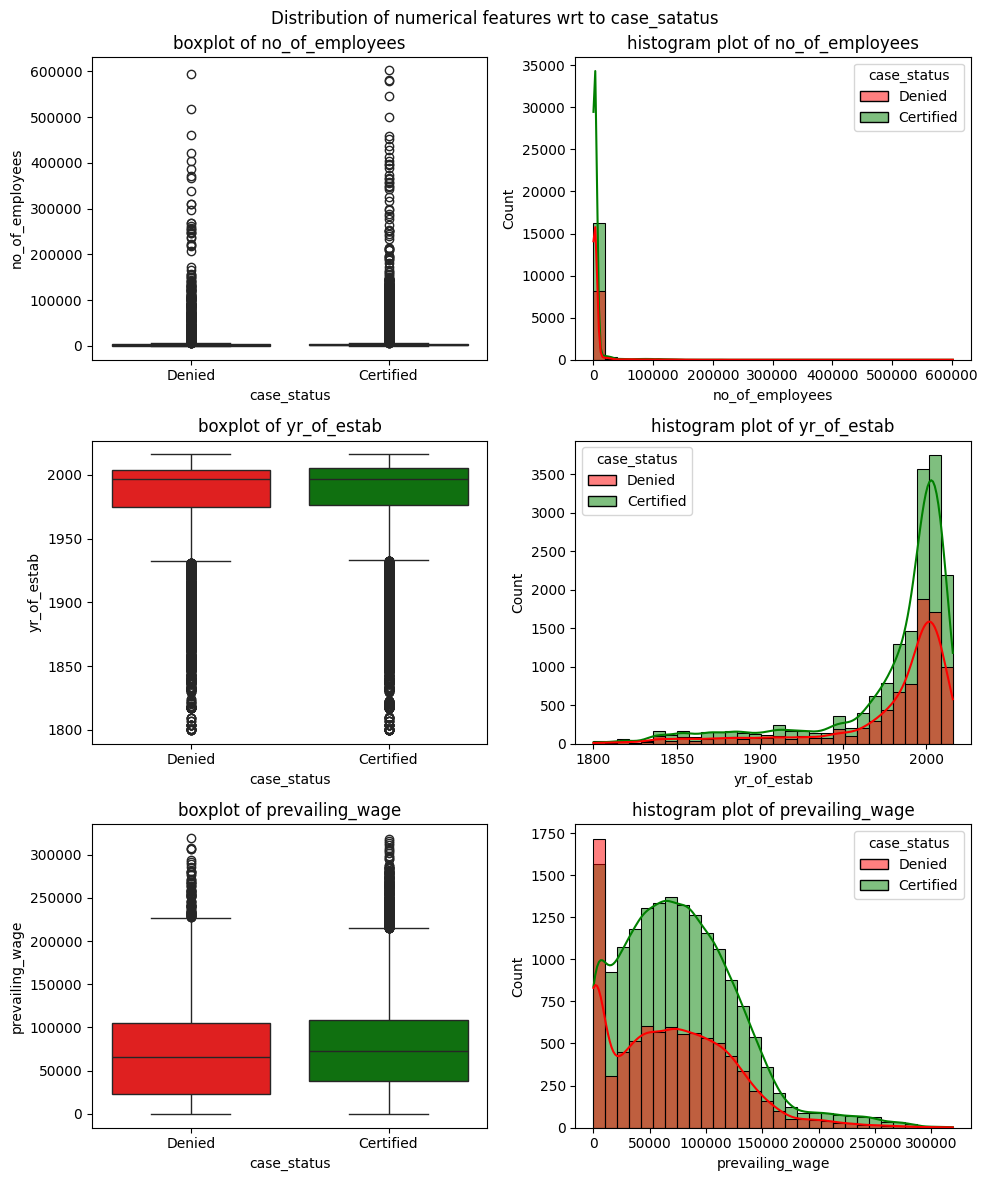

In [ ]:
colors=['red','green']
fig, ax = plt.subplots(3, 2, figsize=(10,12))
fig.suptitle('Distribution of numerical features wrt to case_satatus')
for i,col in enumerate(continous_feature):
    sns.boxplot(data=df,x='case_status',y=col,color='red',palette=colors,ax=ax[i,0])
    ax[i,0].set_title(f'boxplot of {col}')
    sns.histplot(data=df,x=col,hue='case_status',bins=30,kde=True,palette=colors,ax=ax[i,1])
    ax[i,1].set_title(f'histogram plot of {col}')
fig.tight_layout()



([<matplotlib.patches.Wedge at 0x27cdf6a8d30>,
 [Text(-0.9504959274724624, -0.553676342151499, 'certified'),
  Text(0.950495823794605, 0.5536765201351918, 'denied')],
 [Text(-0.5184523240758885, -0.30200527753718126, '66.79%'),
  Text(0.5184522675243299, 0.30200537461919547, '33.21%')])

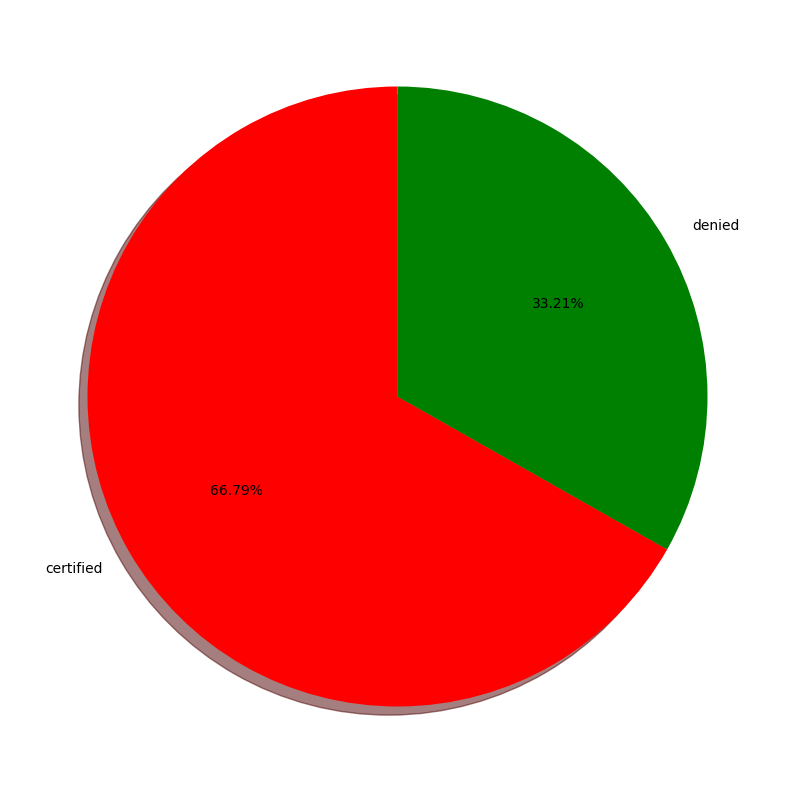

In [27]:
percentage=df.case_status.value_counts(normalize=True)*100
labels =['certified','denied']
fig,ax=plt.subplots(figsize=(10,12))
colors=['red','green']
ax.pie(percentage,labels=labels,startangle=90,autopct='%1.2f%%',colors=colors,shadow=True)


                         DATA VISUALIZATION : STEP BY STEP VISUALIZATION OF EVERY FEATURE IN DATATSET 




                         1 . DOES CONINENT HAS ANY SIGNIFICANT IMAPCT IN CASE_STATUS.

In [70]:
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [71]:
df.groupby('continent')['case_status'].value_counts(normalize=True)*100

continent      case_status
Africa         Certified      72.050817
               Denied         27.949183
Asia           Certified      65.310480
               Denied         34.689520
Europe         Certified      79.233655
               Denied         20.766345
North America  Certified      61.877278
               Denied         38.122722
Oceania        Certified      63.541667
               Denied         36.458333
South America  Certified      57.863850
               Denied         42.136150
Name: proportion, dtype: float64

Text(0, 0.5, 'count')

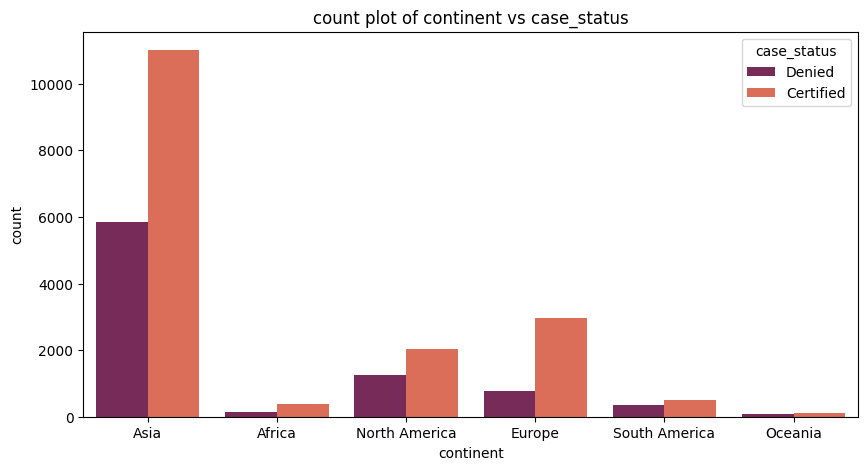

In [75]:
plt.subplots(figsize=(10,5))
sns.countplot(x='continent',hue='case_status',data=df,palette='rocket')
plt.title('count plot of continent vs case_status')
plt.xlabel('continent')
plt.ylabel('count')


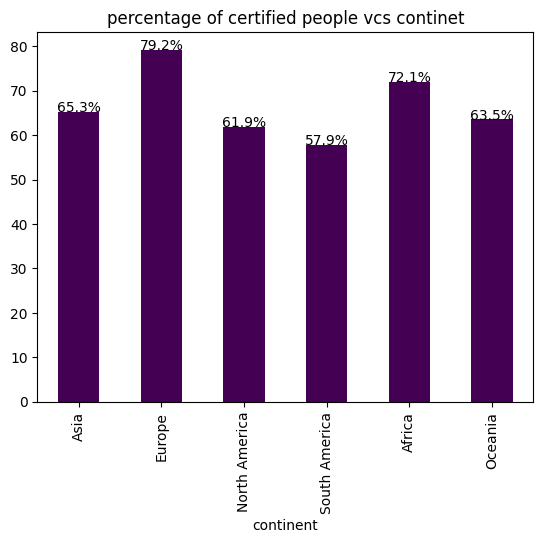

In [76]:
df2=df.copy()
(100*df2[df2["case_status"].isin(['Certified'])]['continent'].value_counts()/df2['continent'].value_counts()).plot(kind='bar',colormap='viridis')
plt.title('percentage of certified people vcs continet')
orrder1=(100*df2[df2["case_status"].isin(['Certified'])]['continent'].value_counts()/df2['continent'].value_counts())
for n in range (orrder1.shape[0]):
    count=orrder1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count,strt,ha='center')

In [81]:
df.groupby('continent')['case_status'].value_counts(normalize=True)*100

continent      case_status
Africa         Certified      72.050817
               Denied         27.949183
Asia           Certified      65.310480
               Denied         34.689520
Europe         Certified      79.233655
               Denied         20.766345
North America  Certified      61.877278
               Denied         38.122722
Oceania        Certified      63.541667
               Denied         36.458333
South America  Certified      57.863850
               Denied         42.136150
Name: proportion, dtype: float64

Text(0, 0.5, 'count')

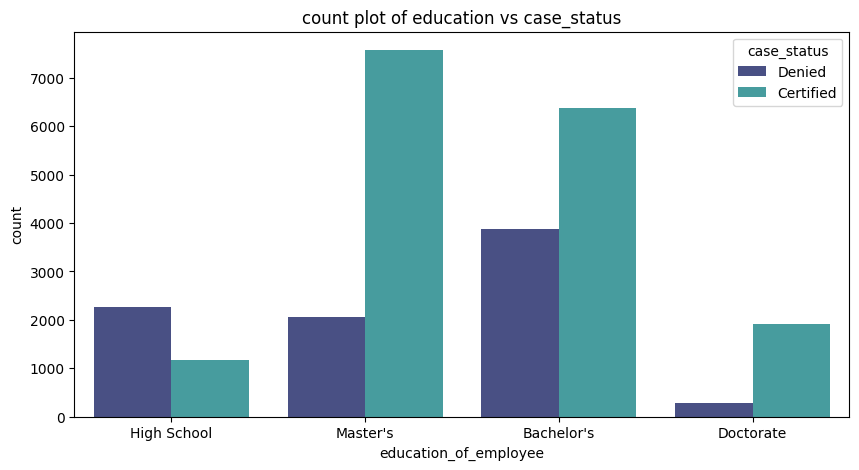

In [82]:
plt.subplots(figsize=(10,5))
sns.countplot(x='education_of_employee',hue='case_status',data=df,palette='mako')
plt.title('count plot of education vs case_status')
plt.xlabel('education_of_employee')
plt.ylabel('count')

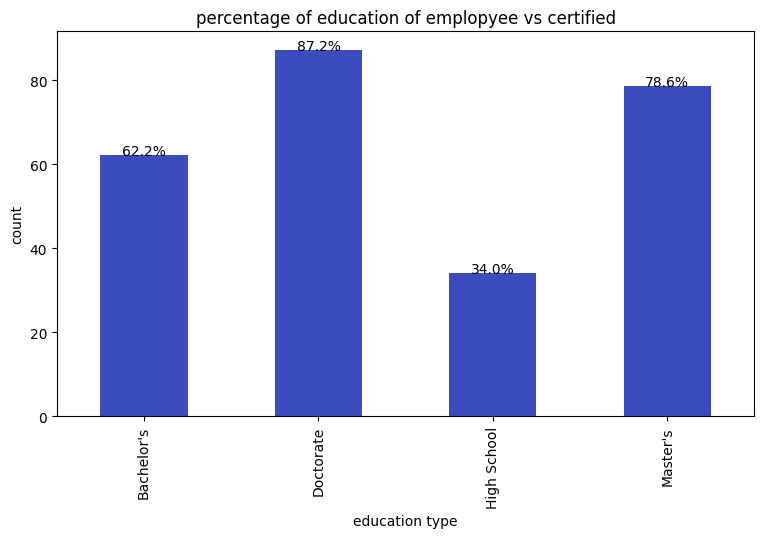

In [103]:
plt.figure(figsize=(9,5))
(100*df2[df2["case_status"].isin(['Certified'])]['education_of_employee'].value_counts()/df2['education_of_employee'].value_counts()).plot(kind='bar',colormap='coolwarm')
plt.title('percentage of education of emplopyee vs certified')
plt.xlabel('education type')
plt.ylabel('count')
order1=(100*df2[df2["case_status"].isin(['Certified'])]['education_of_employee'].value_counts()/df2['education_of_employee'].value_counts())
for n in range(order1.shape[0]):
    count=order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count,strt,ha='center')


In [105]:
df.groupby('has_job_experience')['case_status'].value_counts(normalize=True).to_frame()*100

proportion
has_job_experience case_status            
N                  Certified     56.134108
                   Denied        43.865892
Y                  Certified     74.476422
                   Denied        25.523578

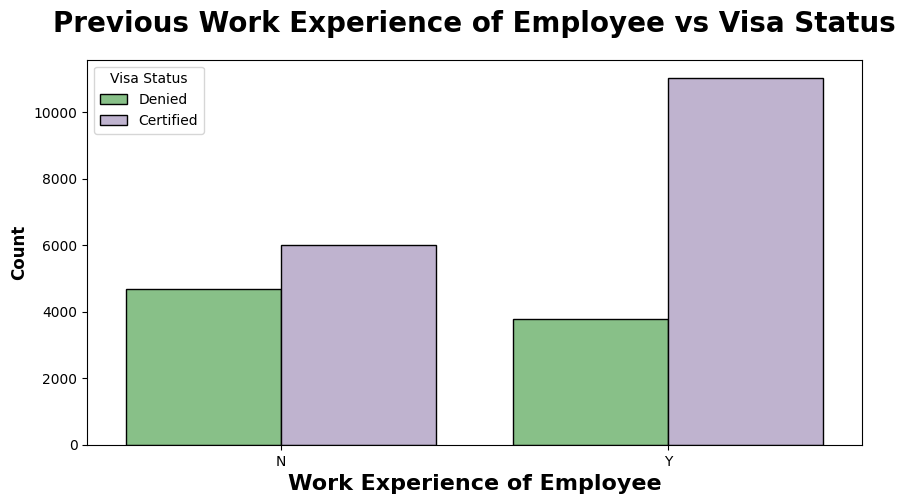

In [107]:
plt.subplots(figsize=(10,5))
sns.countplot(x="has_job_experience",hue="case_status", data=df, ec= "black",palette="Accent")
plt.title("Previous Work Experience of Employee vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Work Experience of Employee", weight="bold", fontsize=16)
plt.legend(title="Visa Status", fancybox=True)
plt.show()

(array([0, 1]), [Text(0, 0, 'Y'), Text(1, 0, 'N')])

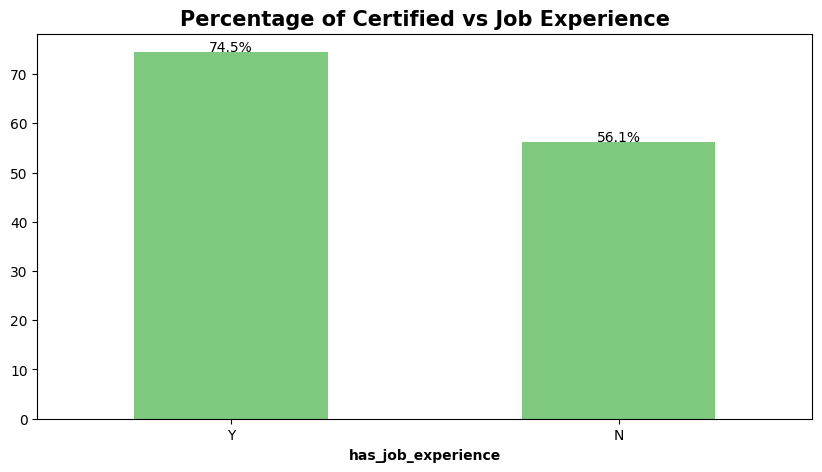

In [110]:
plt.figure(figsize=[10,5])

(100*df2[df2["case_status"].isin(['Certified'])]['has_job_experience'].value_counts()/df2['has_job_experience'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of Certified vs Job Experience" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["case_status"].isin(['Certified'])]['has_job_experience'].value_counts()/df2['has_job_experience'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('has_job_experience' , fontweight ='bold')
plt.xticks(rotation=0)

In [111]:
df.groupby('requires_job_training')['case_status'].value_counts(normalize=True).to_frame()*100

proportion
requires_job_training case_status            
N                     Certified     66.645949
                      Denied        33.354051
Y                     Certified     67.884941
                      Denied        32.115059

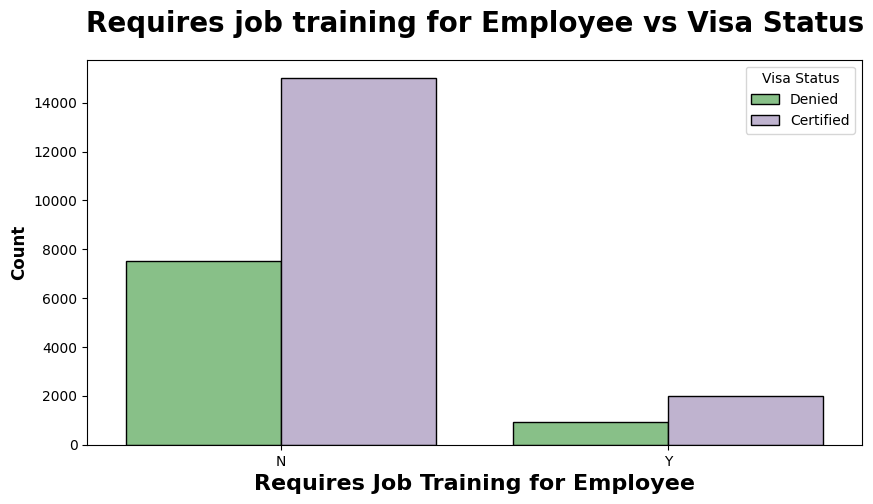

In [114]:
plt.subplots(figsize=(10,5))
sns.countplot(x="requires_job_training",hue="case_status", data=df, ec= "black",palette="Accent")
plt.title("Requires job training for Employee vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Requires Job Training for Employee", weight="bold", fontsize=16)
plt.legend(title="Visa Status", fancybox=True)
plt.show()

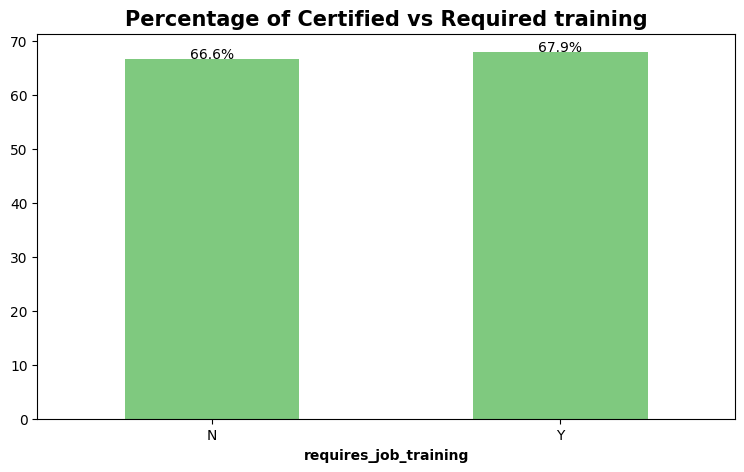

In [116]:
plt.figure(figsize=[9,5])

(100*df2[df2["case_status"].isin(['Certified'])]['requires_job_training'].value_counts()/df2['requires_job_training'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of Certified vs Required training" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["case_status"].isin(['Certified'])]['requires_job_training'].value_counts()/df2['requires_job_training'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('requires_job_training' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

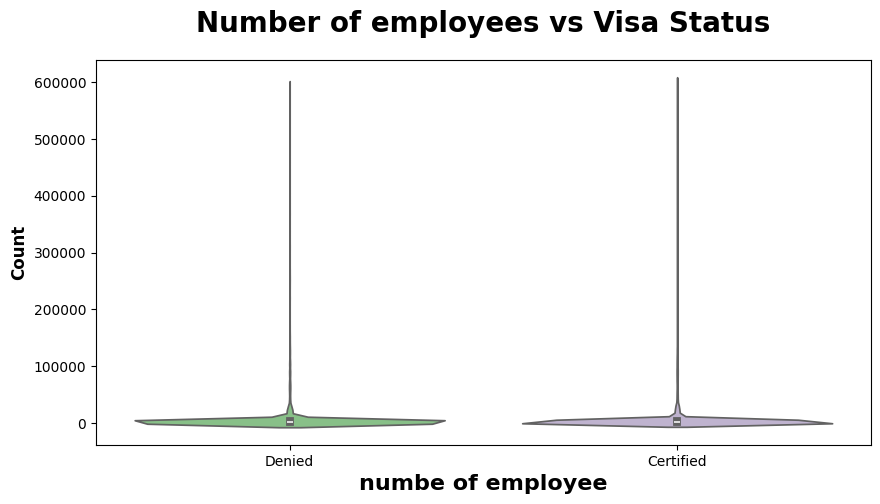

In [128]:
plt.subplots(figsize=(10,5))
sns.violinplot(x="case_status",y='no_of_employees', data=df, palette="Accent")
plt.title("Number of employees vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("numbe of employee", weight="bold", fontsize=16)
plt.ylim()
plt.show()

In [129]:
df.groupby('unit_of_wage')['case_status'].value_counts(normalize=True)

unit_of_wage  case_status
Hour          Denied         0.653686
              Certified      0.346314
Month         Certified      0.617978
              Denied         0.382022
Week          Certified      0.621324
              Denied         0.378676
Year          Certified      0.698850
              Denied         0.301150
Name: proportion, dtype: float64

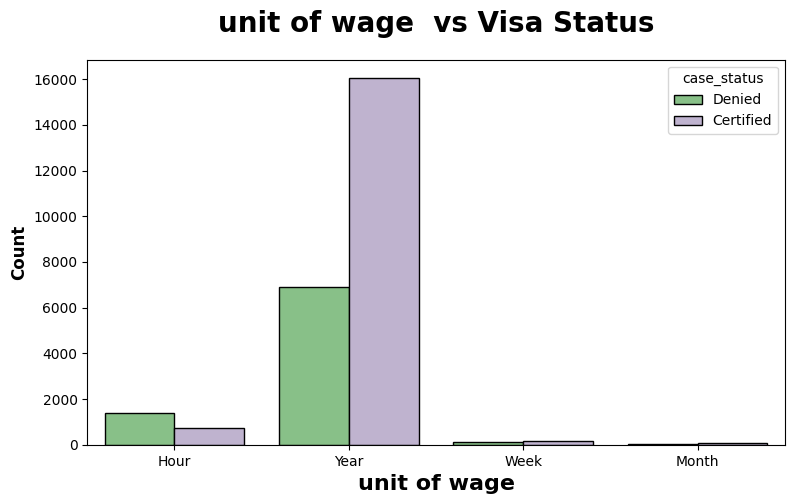

In [132]:
plt.subplots(figsize=(9,5))
sns.countplot(x="unit_of_wage",hue="case_status", data=df,ec='k', palette='Accent')
plt.title("unit of wage  vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.xlabel("unit of wage", weight="bold", fontsize=16)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.show()

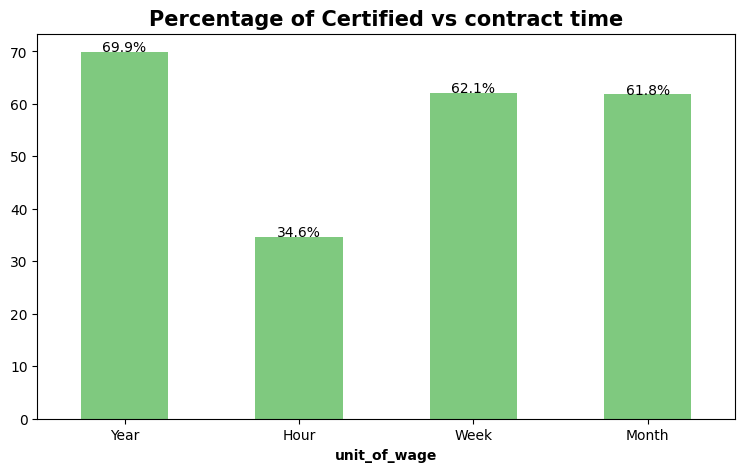

In [133]:
plt.figure(figsize=[9,5])

(100*df2[df2["case_status"].isin(['Certified'])]['unit_of_wage'].value_counts()/df2['unit_of_wage'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of Certified vs contract time" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["case_status"].isin(['Certified'])]['unit_of_wage'].value_counts()/df2['unit_of_wage'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('unit_of_wage' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

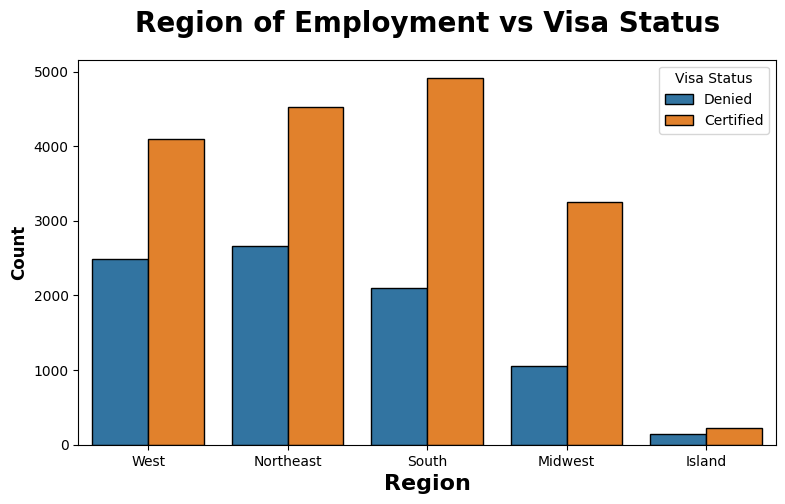

In [135]:
plt.subplots(figsize=(9,5))
sns.countplot(x="region_of_employment",hue="case_status", data=df,ec='k')
plt.title("Region of Employment vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.xlabel("Region", weight="bold", fontsize=16)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.legend(title="Visa Status", fancybox=True)
plt.show()

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Island'),
  Text(1, 0, 'Midwest'),
  Text(2, 0, 'Northeast'),
  Text(3, 0, 'South'),
  Text(4, 0, 'West')])

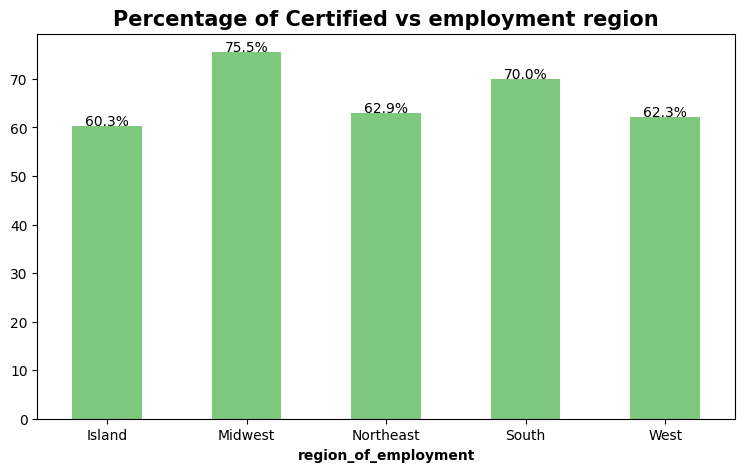

In [137]:
plt.figure(figsize=[9,5])

(100*df2[df2["case_status"].isin(['Certified'])]['region_of_employment'].value_counts()/df2['region_of_employment'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of Certified vs employment region" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["case_status"].isin(['Certified'])]['region_of_employment'].value_counts()/df2['region_of_employment'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('region_of_employment' , fontweight ='bold')
plt.xticks(rotation=0)

In [138]:
df.groupby('prevailing_wage').case_status.value_counts()

prevailing_wage  case_status
2.1367           Certified      1
2.9561           Denied         1
3.0031           Denied         1
3.3188           Denied         1
3.4889           Certified      1
                               ..
311734.4900      Certified      1
314156.0600      Certified      1
315497.6000      Certified      1
318446.0500      Certified      1
319210.2700      Denied         1
Name: count, Length: 25462, dtype: int64

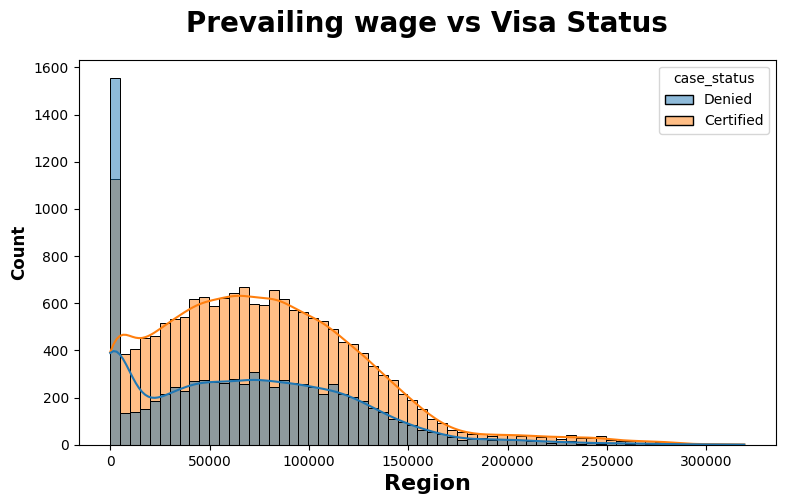

In [140]:
plt.subplots(figsize=(9,5))
sns.histplot(x="prevailing_wage",hue="case_status", data=df, kde=True)
plt.title("Prevailing wage vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.xlabel("Region", weight="bold", fontsize=16)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.show()

In [141]:
print('Average Prevailing wage based on Employee education')
df.groupby('education_of_employee')['prevailing_wage'].mean().to_frame().sort_values(by='prevailing_wage',ascending=False)

Average Prevailing wage based on Employee education


,prevailing_wage
education_of_employee,
Master's,78843.057843
Bachelor's,73405.443735
High School,71582.147756
Doctorate,64561.076657


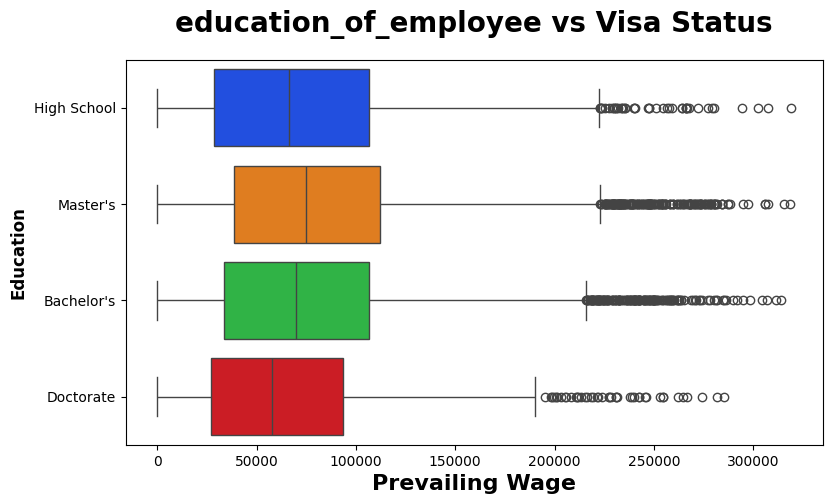

In [143]:
plt.subplots(figsize=(9,5))
sns.boxplot(y="education_of_employee",x = "prevailing_wage", data=df,palette='bright')
plt.title("education_of_employee vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.xlabel("Prevailing Wage", weight="bold", fontsize=16)
plt.ylabel("Education", weight="bold", fontsize=12)
plt.show()

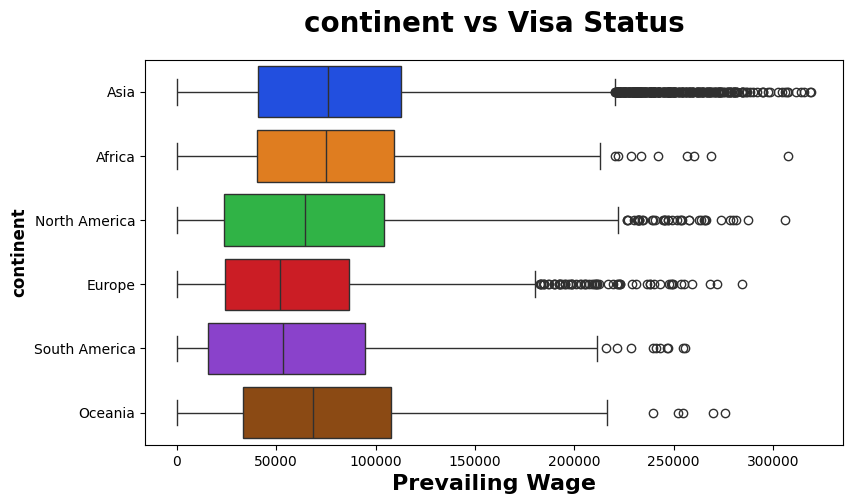

In [145]:
plt.subplots(figsize=(9,5))
sns.boxplot(y="continent",x = "prevailing_wage", data=df,palette='bright')
plt.title("continent vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.xlabel("Prevailing Wage", weight="bold", fontsize=16)
plt.ylabel("continent", weight="bold", fontsize=12)
plt.show()

Text(0, 0.5, 'Prevailing Wage')

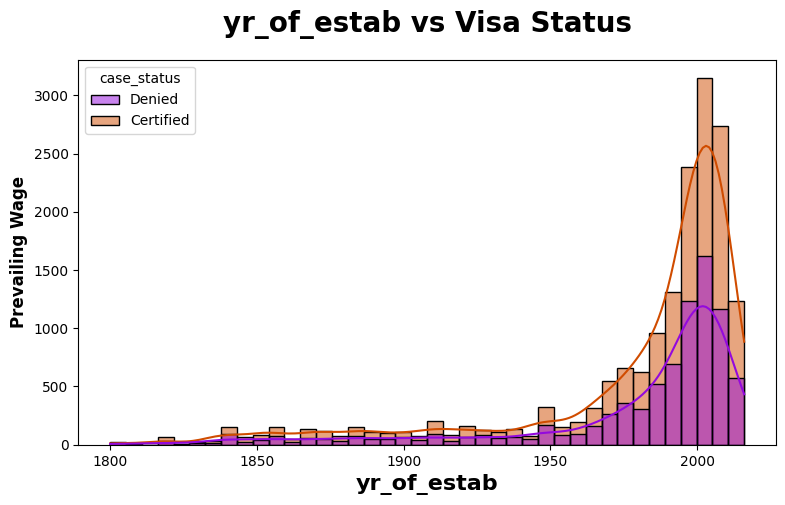

In [148]:
plt.subplots(figsize=(9,5))
sns.histplot(x = "yr_of_estab", data=df,palette='gnuplot', bins=40, hue='case_status',kde=True)
plt.title("yr_of_estab vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.xlabel("yr_of_estab", weight="bold", fontsize=16)
plt.ylabel("Prevailing Wage", weight="bold", fontsize=12)